<a href="https://colab.research.google.com/github/faridelya/Pandas-Seaborn-Numpy/blob/main/A15_ANOVA_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Question 1. State the null hypothesis for the ANOVA test for this specific research**


**Answer**


H₀: μ₁= μ₂ = μ₃ = … = μ𝒸     

Null Hypothesis is that all subregions or groups or samples of percnt household county where no internet access "per_no_internet"  mean is equal.



## **Question 2. State the alternative hypothesis for the ANOVA test for this specific research question.**

**Alternative Hypothesis**: It states our assumption, so the purpose of our research about the data.
- H₁: Not all Subregions county or groups means are equal



## **Question 3. Why do we need to use an ANOVA test to investigate this research question as opposed to a T-Test?**

ANOVA (Analysis of Variance) is a statistical method for analyzing the relationship between more than two independent groups of a variable(comparing their means) and its effect on the numerical dependent variable. while t-test use for two groups comparison.

## **Question 4. Explain how the F-Value associated with an ANOVA test is calculated.What defines the numerator and denominator? What defines the degrees of freedom?**

The F value can be used to determine whether the test is statistically significant.

The F value is used in analysis of variance (ANOVA). It is calculated by dividing two mean squares. This calculation determines the ratio of explained variance to unexplained variance.
The F distribution is a theoretical distribution. There are many of these distributions, and each of them differs based on the degrees of freedom

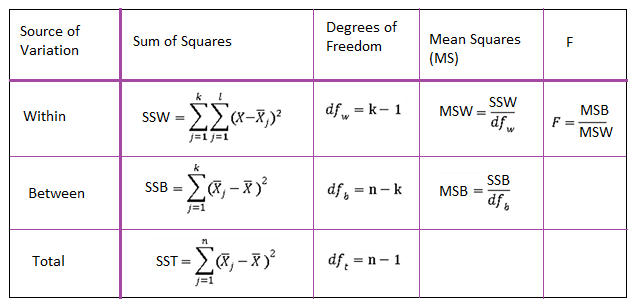

**Formual:**
- **F = MST/MSE**
- MST = SST/ p-1 ( Here p-1 is degree of fredom witin groups )
- MSE = SSE/N-p ( Here N-p is degree of fredom btwn groups )
- SSE = ∑ (n−1)
 

Where,

**F** = Anova Coefficient

**MSB** = Mean sum of squares between the groups ( degree of freedom btw groupsK-1 where k - Number of groups or cell means )

**MSW** = Mean sum of squares within the groups

**MSE** = Mean sum of squares due to error

**SST** = total Sum of squares

**p** = Total number of populations

**n** = The total number of samples in a population

**SSW** = Sum of squares within the groups

**SSB** = Sum of squares between the groups

**SSE** = Sum of squares due to error

**s** = Standard deviation of the samples

**N** = Total number of observations





## **Question 5. List and explain the assumptions of ANOVA**

**1-)** **Normality:** Our response variable is approximately normally distributed for each category of the independent variable.

**2-)** **Homogeneity:**  Assumption of the equal variance of different samples even if they come from different populations.

**3-)** **Independent Observations:** Independent data means that there should be no relationship between the observations within or between the groups themselves.

## **Task 1. Read in the data table**

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import numpy as np

In [ ]:
df = pd.read_csv("/content/us_county_data.csv")
df[['NAME', 'STATE_NAME', 'STATE_ABBR','SUB_REGION',  'households', 'per_no_internet']]

,NAME,STATE_NAME,STATE_ABBR,SUB_REGION,households,per_no_internet
0,Autauga County,Alabama,AL,E S Cen,21559,15.339301
1,Baldwin County,Alabama,AL,E S Cen,84047,11.919521
2,Barbour County,Alabama,AL,E S Cen,9322,28.963742
3,Bibb County,Alabama,AL,E S Cen,7259,20.939523
4,Blount County,Alabama,AL,E S Cen,21205,18.486206
...,...,...,...,...,...,...
3099,Sweetwater County,Wyoming,WY,Mtn,15726,9.525626
3100,Teton County,Wyoming,WY,Mtn,10027,5.385459
3101,Uinta County,Wyoming,WY,Mtn,7789,6.817306
3102,Washakie County,Wyoming,WY,Mtn,3437,12.481816


## **Task 2. Create a grouped boxplot that shows the distribution of percent of households without internet access grouped by subregion.**

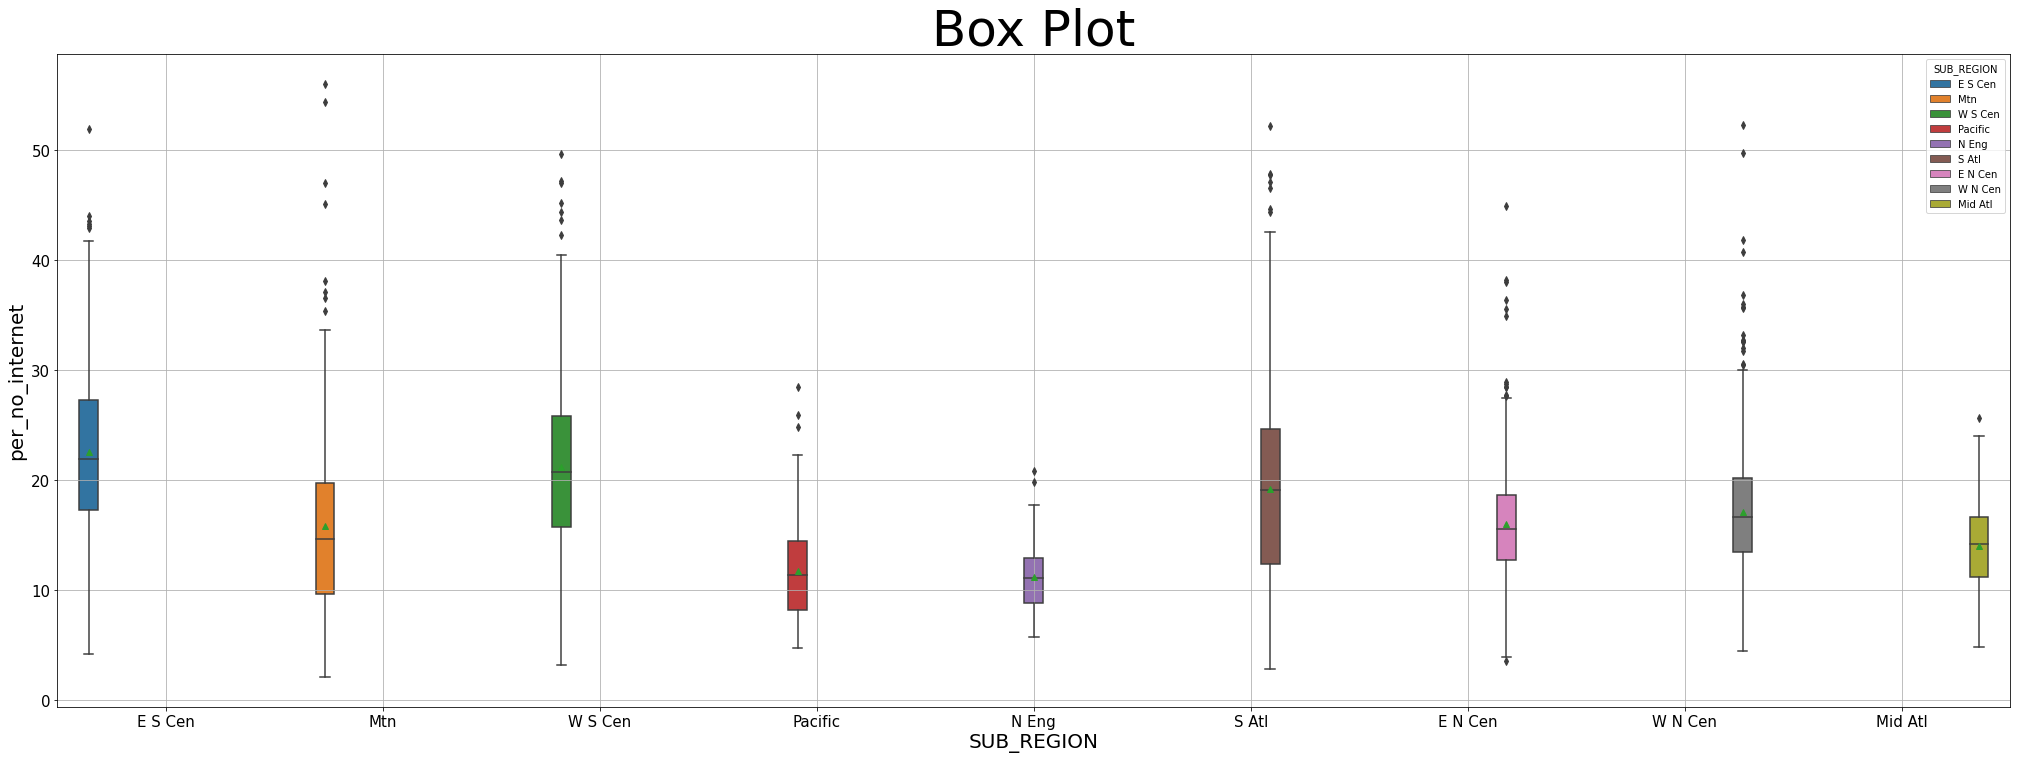

In [ ]:
fig , ax = plt.subplots(figsize=(35,12))
b=sns.boxplot(data=df, x="SUB_REGION", y="per_no_internet", hue="SUB_REGION", ax=ax, showmeans=True);
b.axes.set_title("Box Plot",fontsize=50)
b.set_xlabel("SUB_REGION",fontsize=20)
b.set_ylabel("per_no_internet",fontsize=20)
b.tick_params(labelsize=15)
plt.grid( which='both')
plt.show()

In [ ]:
for i in df['SUB_REGION'].unique():  
  print("lenght of ",i ,"    ",df[df['SUB_REGION'] ==i].size)

lenght of  E S Cen      13468
lenght of  Mtn      10397
lenght of  W S Cen      17390
lenght of  Pacific      4921
lenght of  N Eng      2479
lenght of  S Atl      21608
lenght of  E N Cen      16169
lenght of  W N Cen      22866
lenght of  Mid Atl      5550


## **Task 3. Perform 50 iterations of an ANOVA test using different random subset of the available counties. Perform 50 replicate tests for each of the following sample sizes: 5,10, 20, 30, 40, 50**.

In [ ]:
#50 iterations of an ANOVA test using different random subset of the available counties.

data = df[['NAME','per_no_internet']]
iter_lst=[]
f_sc =[]
P_sc = []
r = 50 # use this to get random sample at each iteration without this value random sample state set and give same result on each  iteration
for i in range(1,51):
  
  one = data.sample(n=500, random_state= np.random.RandomState(r), )
  one =one['per_no_internet']
  secnd = data.sample(n=400, random_state=np.random.RandomState(r), )
  secnd = secnd['per_no_internet']
  third = data.sample(n=350, random_state=np.random.RandomState(r) )
  third = third['per_no_internet']
  r+=1 # here we update random state value in each loop so that we can get unique results
  F,p = f_oneway(one,secnd,third)

  iter_lst.append(i)
  f_sc.append(F)
  P_sc.append(p)

tabel1 = pd.DataFrame({"Iteration":iter_lst,"F":f_sc,"P":P_sc})


In [ ]:
tabel1.head(5)

,Iteration,F,P
0,1,0.081209,0.922006
1,2,0.833077,0.434951
2,3,0.540889,0.582367
3,4,0.279990,0.755839
4,5,0.340012,0.711827


In [ ]:
#50 replicate tests for each of the following sample sizes: 5,10, 20, 30, 40, 50

data = df[['NAME','per_no_internet']]  # county column is one population and we will take different size of samples

# for first six different size of sample result to save 
iter_lst=[]
f_sc =[]
P_sc = []





r = 50 # use this to get random sample at each iteration without this value random sample state set and give same result on each  iteration
for i in range(1,51):
  
    one = data.sample(n=5, random_state= np.random.RandomState(r), )
    one=one['per_no_internet']
    secnd = data.sample(n=10, random_state=np.random.RandomState(r), )
    secnd = secnd['per_no_internet']
    third = data.sample(n=20, random_state=np.random.RandomState(r) )
    third = third['per_no_internet']
    frth = data.sample(n=30, random_state=np.random.RandomState(r) )
    frth = frth['per_no_internet']
    five = data.sample(n=40, random_state=np.random.RandomState(r) )
    five = five['per_no_internet']
    six = data.sample(n=50, random_state=np.random.RandomState(r) )
    six= six['per_no_internet']
    r+=1
     # here we update random state value in each loop so that we can get unique results
    F,p = f_oneway(one,secnd,third, frth,five,six)

    iter_lst.append(i)
    f_sc.append(F)
    P_sc.append(p)


Tabel2 = pd.DataFrame({"Iteration":iter_lst,"first test F_value":f_sc, "first test P_value":P_sc })

## **Task 4. Extract the obtained p-value for each test and save them to a table**

In [ ]:
tabel1.columns = pd.MultiIndex.from_product([[" Perform 50 iterations tests"], tabel1.columns])
Tabel2.columns = pd.MultiIndex.from_product([["50 replicate tests"], Tabel2.columns])
both_test = pd.concat([tabel1,Tabel2], axis=1)
both_test.head(6)

Perform 50 iterations tests                     50 replicate tests  \
                     Iteration         F         P          Iteration   
0                            1  0.081209  0.922006                  1   
1                            2  0.833077  0.434951                  2   
2                            3  0.540889  0.582367                  3   
3                            4  0.279990  0.755839                  4   
4                            5  0.340012  0.711827                  5   
5                            6  0.020203  0.980000                  6   

                                         
  first test F_value first test P_value  
0           0.191664           0.965353  
1           0.434648           0.823841  
2           0.804646           0.548035  
3           0.165619           0.974809  
4           0.143256           0.981755  
5           0.124021           0.986829

## **Task 5. Calculate the mean and standard deviation of the obtained p-values for each sample size**

In [ ]:
p_vl_mean, p_vl_std = both_test[both_test.columns[2]].mean(),both_test[both_test.columns[2]].std()
p_vle_mean ,p_vle_std = both_test[both_test.columns[5]].mean(),both_test[both_test.columns[5]].std()

print("Perform 50 iterations tests:\n\n", "mean = ",p_vl_mean,"\n Std = ",p_vl_std,"\n")
print("50 replicate tests:\n\n", "mean = ",p_vle_mean,"\n Std = ",p_vle_std)

Perform 50 iterations tests:

 mean =  0.8731115405239109 
 Std =  0.12633609616319447 

50 replicate tests:

 mean =  0.8084213146702044 
 Std =  0.24255642554127801


## **Question 6: Based on the grouped boxplot, what do you expect to be the results of the ANOVA test? Explain your reasoning.**

Before testing the boxplot data we do some assumption and we will not be doing dependence assumption  
- Already mentioned we will not worry about testing assumptions and assume that the results are valid.

**Normality Assumption**

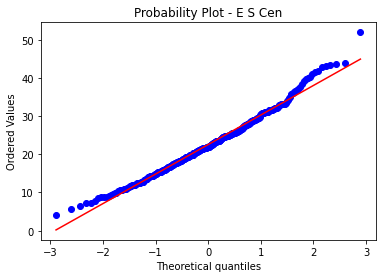

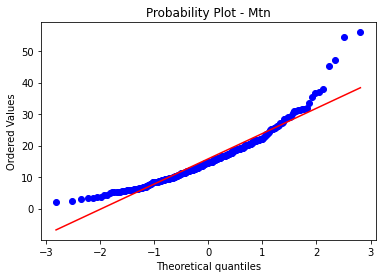

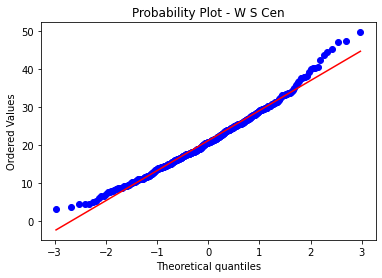

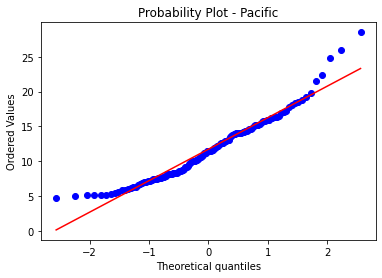

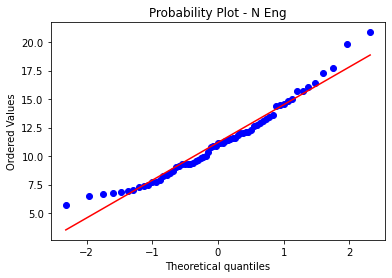

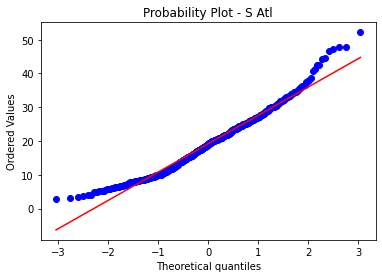

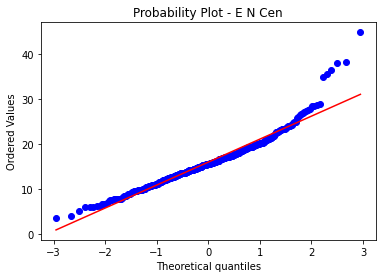

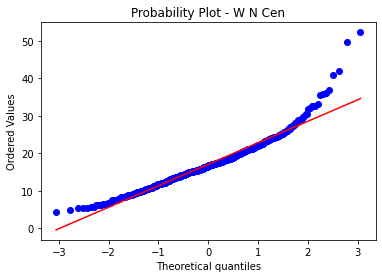

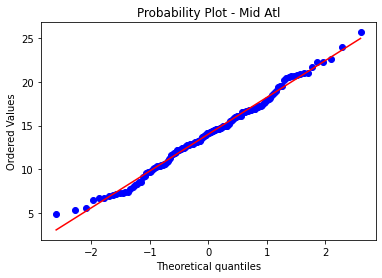

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
fig , ax = plt.subplots()
unique_region = df['SUB_REGION'].unique()
for region in unique_region:
    stats.probplot(df[df['SUB_REGION']== region]['per_no_internet'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  region)
    plt.show()

we may assume that the data for each group falls roughly on a straight line.

**Homogeneity of variance Assumption**

In [ ]:
a = df[['SUB_REGION','per_no_internet']]
ratio = a.groupby('SUB_REGION').std().max() / a.groupby('SUB_REGION').std().min()
ratio

per_no_internet    2.562628
dtype: float64

The ratio of the largest to the smallest sample standard deviation is 2.562. That is greater than the threshold of 2. Thus, we conclude that the assumptions are **not fulfilled**.

**Now random sampling and ANOVA Test**

In [ ]:
# random sampling
df = df[['SUB_REGION','per_no_internet']].sample(n=df['SUB_REGION'].size, random_state=np.random.RandomState(1), )

escen = df[df['SUB_REGION']=='E S Cen']
mtn = df[df['SUB_REGION']=='Mtn']
wscen = df[df['SUB_REGION']=='W S Cen']
pacific = df[df['SUB_REGION']=='Pacific']
neng = df[df['SUB_REGION']=='N Eng']
satl = df[df['SUB_REGION']=='S Atl']
encen = df[df['SUB_REGION']=='E N Cen']
wncen = df[df['SUB_REGION']=='W N Cen']
midatl = df[df['SUB_REGION']== 'Mid Atl']

F,p = f_oneway(escen['per_no_internet'],mtn['per_no_internet'],wscen['per_no_internet'], pacific['per_no_internet'],
               neng['per_no_internet'],satl['per_no_internet'],encen['per_no_internet'],wncen['per_no_internet'],midatl['per_no_internet'])

print("\nOne the basis of boxplot we can can have this result of ANOVA test\n\n ", "\nF_vlue =",F ,"\nP_vlue = ",p)


One the basis of boxplot we can can have this result of ANOVA test

  
F_vlue = 70.13329849946042 
P_vlue =  2.4443092727044064e-106


we have evidence that p_value 2.4443092727044064e-106< alpha 0.05  so we reject null hypothesis it means the mean of subregion groups is not equal 

## **Question 7: Compare the mean p-values obtained relative to the different sample sizes.Does sample size impact the p-value obtained when using different samples from the same population?**

In [ ]:
data = df[['NAME','per_no_internet']]  # county column is one population and we will take different size of samples

# for first six different size of sample result to save 
iter_lst=[]
f_sc =[]
P_sc = []

# for other six sample of different size reult to save we will compare both results
f =[ ]
p_= []

#sample sizes: 5,10, 20, 30, 40, 50
r = 50 # use this to get random sample at each iteration without this value random sample state set and give same result on each  iteration
for i in range(1,51):
    
    one = data.sample(n=5, random_state= np.random.RandomState(r), )
    one=one['per_no_internet']
    secnd = data.sample(n=10, random_state=np.random.RandomState(r), )
    secnd = secnd['per_no_internet']
    third = data.sample(n=20, random_state=np.random.RandomState(r) )
    third = third['per_no_internet']
    frth = data.sample(n=30, random_state=np.random.RandomState(r) )
    frth = frth['per_no_internet']
    five = data.sample(n=40, random_state=np.random.RandomState(r) )
    five = five['per_no_internet']
    six = data.sample(n=50, random_state=np.random.RandomState(r) )
    six= six['per_no_internet']
   
    
    F,p = f_oneway(one,secnd,third, frth,five,six)

    iter_lst.append(i)
    f_sc.append(F)
    P_sc.append(p)
    #sample sizes: 60. 20, 31, 44, 50, 34
    onee = data.sample(n=60, random_state= np.random.RandomState(r), )
    onee=onee['per_no_internet']
    secndd = data.sample(n=20, random_state=np.random.RandomState(r), )
    secndd = secndd['per_no_internet']
    thirdd = data.sample(n=31, random_state=np.random.RandomState(r) )
    thirdd = thirdd['per_no_internet']
    frthh = data.sample(n=44, random_state=np.random.RandomState(r) )
    frthh = frthh['per_no_internet']
    fivee = data.sample(n=50, random_state=np.random.RandomState(r) )
    fivee = fivee['per_no_internet']
    sixx = data.sample(n=34, random_state=np.random.RandomState(r) )
    sixx= sixx['per_no_internet']
    r+=1 # here we update random state value in each loop so that we can get unique results
    F2,p2 = f_oneway(onee,secndd,thirdd, frthh,fivee,sixx)

    f.append(F2)
    p_.append(p2)

compare_mean = pd.DataFrame({"Iteration":iter_lst,"first test F_value":f_sc,"secnd test F_value":f, "first test P_value":P_sc,"secnd test P_value":p_ })


In [ ]:
first = compare_mean['first test P_value'].mean()
second = compare_mean['secnd test P_value'].mean()
print(" comparing mean of p_value  for ANOVA test\n ","\nfirst test p_value mean = ", first, "\nsecond test p_value mean= ",second)
compare_mean[["Iteration",'first test P_value',"secnd test P_value"]].head(10)

 comparing mean of p_value  for ANOVA test
  
first test p_value mean =  0.8084213146702044 
second test p_value mean=  0.9267237262450762


,Iteration,first test P_value,secnd test P_value
0,1,0.965353,0.982694
1,2,0.823841,0.737233
2,3,0.548035,0.934871
3,4,0.974809,0.999131
4,5,0.981755,0.994702
5,6,0.986829,0.990896
6,7,0.953791,0.994643
7,8,0.995677,0.999792
8,9,0.822130,0.710099
9,10,0.873866,0.949761


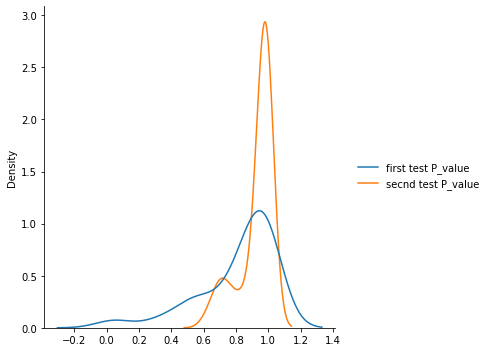

In [ ]:
sns.displot(data=compare_mean[["first test P_value",	"secnd test P_value"]],  kind="kde")

**Yes sample size impact the p-value obtained when using different samples**

## **Question 8: Compare the standard deviation of the p-values relative to the different sample sizes. Does sample size impact the variability of the p-value obtained when using different samples from the same population?**

In [ ]:
first = compare_mean['first test P_value'].std()
second = compare_mean['secnd test P_value'].std()
print(" comparing mean of p_value  for ANOVA test\n ","\nfirst test p_value Std = ", first, "\nsecond test p_value Std = ",second)
compare_mean[["Iteration",'first test P_value',"secnd test P_value"]].head(10)

 comparing mean of p_value  for ANOVA test
  
first test p_value Std =  0.24255642554127801 
second test p_value Std =  0.10450006572051143


,Iteration,first test P_value,secnd test P_value
0,1,0.965353,0.982694
1,2,0.823841,0.737233
2,3,0.548035,0.934871
3,4,0.974809,0.999131
4,5,0.981755,0.994702
5,6,0.986829,0.990896
6,7,0.953791,0.994643
7,8,0.995677,0.999792
8,9,0.822130,0.710099
9,10,0.873866,0.949761


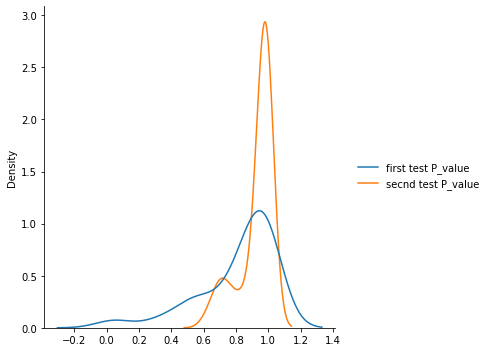

In [ ]:
sns.displot(data=compare_mean[["first test P_value",	"secnd test P_value"]],  kind="kde")

**Yes sample size impact the variability of the p-value obtained when using different samples from the same population**

## **Question 9: Summarize how the size of the sample drawn from the population may impact the results of an ANOVA test and how this may impact your interpretation and use of the results.** 

[click here to see and write this answer](https://www.statology.org/anova-unequal-sample-size/ )